# US Cases --> US State Cases

## Initialize

### Import Packages

In [1]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt

### Collect Relevant Datasets

In [3]:
# Select Date Range, Store as DataFrame of Strings
# We use this to select all the relevant files, organized by date

start_date = datetime.date(2021,1,1)
end_date = datetime.date(2021,4,14)

dates = pd.date_range(start_date,end_date-datetime.timedelta(days=1),freq='d')
dates_str = dates.strftime("%m-%d-%Y")

In [4]:
# Collect list of files for all the selected dates

file_list = [ ('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/'
            + date
            + '.csv') for date in dates_str ]

In [9]:
%%time

# List of DataFrames - each one covers one day of global data
df_list = [ pd.read_csv(file) for file in file_list ]

Wall time: 48.7 s


In [6]:
# DataFrame that contains all the files' data 

super_cases = pd.concat(df_list)

In [6]:
# len(super_cases)

In [7]:
# len(df_list[0])*len(dates_str)

In [8]:
# landa = list(super_cases.index)
# for i in landa:
#     if i == 100:
#         print('yo')

In [9]:
# list(super_cases['Country_Region'])

In [10]:
super_cases.columns

Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incident_Rate', 'Case_Fatality_Ratio'],
      dtype='object')

In [12]:
# Data from only US counties (counties stored in Admin2)

US_cases = super_cases[super_cases['Country_Region'] == 'US']
US_cases

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
649,1001.0,Autauga,Alabama,US,2021-01-02 05:22:33,32.539527,-86.644082,4239,50,0.0,4189.0,"Autauga, Alabama, US",7587.391935,1.179523
650,1003.0,Baldwin,Alabama,US,2021-01-02 05:22:33,30.727750,-87.722071,13823,169,0.0,13654.0,"Baldwin, Alabama, US",6192.157109,1.2226
651,1005.0,Barbour,Alabama,US,2021-01-02 05:22:33,31.868263,-85.387129,1517,33,0.0,1484.0,"Barbour, Alabama, US",6145.183505,2.175346
652,1007.0,Bibb,Alabama,US,2021-01-02 05:22:33,32.996421,-87.125115,1854,46,0.0,1808.0,"Bibb, Alabama, US",8279.003304,2.481122
653,1009.0,Blount,Alabama,US,2021-01-02 05:22:33,33.982109,-86.567906,4693,63,0.0,4630.0,"Blount, Alabama, US",8115.726490,1.342425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3924,56039.0,Teton,Wyoming,US,2021-04-14 04:20:41,43.935225,-110.589080,3675,9,NaN,NaN,"Teton, Wyoming, US",15662.291169,0.244898
3925,56041.0,Uinta,Wyoming,US,2021-04-14 04:20:41,41.287818,-110.547578,2153,12,NaN,NaN,"Uinta, Wyoming, US",10644.714724,0.557362
3926,90056.0,Unassigned,Wyoming,US,2021-04-14 04:20:41,NaN,NaN,0,0,NaN,NaN,"Unassigned, Wyoming, US",NaN,NaN
3927,56043.0,Washakie,Wyoming,US,2021-04-14 04:20:41,43.904516,-107.680187,898,26,NaN,NaN,"Washakie, Wyoming, US",11505.445227,2.895323


In [13]:
# Latest Date for first cell's Last Update
US_cases.iloc[0].loc['Last_Update']

'2021-01-02 05:22:33'

In [17]:
# US_cases.loc[:, 'Last_Update'].to_datetime()

In [18]:
# hey = pd.to_datetime(US_cases.loc[:, 'Last_Update']) 

# Global Vaccination --> US Vaccination

## Initialize

In [42]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
# import zipfile

In [20]:
# zf = zipfile.ZipFile('https://app.box.com/s/efgnwjbg2cx0j94i401qhgwy0pqbhcg6') 
# df = pd.read_csv(zf.open('intfile.csv'))

In [21]:
# Global Cases
vax_GLO = pd.read_csv('https://raw.githubusercontent.com/govex/COVID-19/master/data_tables/vaccine_data/global_data/time_series_covid19_vaccine_global.csv')
vax_GLO

,Country_Region,Date,Doses_admin,People_partially_vaccinated,People_fully_vaccinated,Report_Date_String,UID
0,Afghanistan,2021-02-22,0.0,0.0,0.0,2021/02/22,4.0
1,Afghanistan,2021-02-23,0.0,0.0,0.0,2021/02/23,4.0
2,Afghanistan,2021-02-24,0.0,0.0,0.0,2021/02/24,4.0
3,Afghanistan,2021-02-25,0.0,0.0,0.0,2021/02/25,4.0
4,Afghanistan,2021-02-26,0.0,0.0,0.0,2021/02/26,4.0
...,...,...,...,...,...,...,...
14037,Zimbabwe,2021-04-17,311901.0,276095.0,35806.0,2021/04/17,716.0
14038,Zimbabwe,2021-04-18,314446.0,278583.0,35863.0,2021/04/18,716.0
14039,Zimbabwe,2021-04-19,316991.0,280568.0,36423.0,2021/04/19,716.0
14040,Zimbabwe,2021-04-20,325007.0,288229.0,36778.0,2021/04/20,716.0


In [26]:
# US daily vaccination data from Global dataset
vax_GLO_USA = vax_GLO[vax_GLO.loc[:, 'Country_Region']=='United States']
vax_GLO_USA.head()

,Country_Region,Date,Doses_admin,People_partially_vaccinated,People_fully_vaccinated,Report_Date_String,UID
13440,United States,2020-12-20,556208.0,556208.0,0.0,2020/12/20,840.0
13441,United States,2020-12-21,614117.0,614117.0,0.0,2020/12/21,840.0
13442,United States,2020-12-22,614117.0,614117.0,0.0,2020/12/22,840.0
13443,United States,2020-12-23,1008025.0,1008025.0,0.0,2020/12/23,840.0
13444,United States,2020-12-24,1008025.0,1008025.0,0.0,2020/12/24,840.0


In [29]:
# Storing Dates as DateTime
vax_GLO_USA.loc[:, 'DateTime'] = pd.to_datetime(vax_GLO_USA.loc[:, 'Date'], format='%Y-%m-%d')
vax_GLO_USA.loc[:, 'DateTime']

13440   2020-12-20
13441   2020-12-21
13442   2020-12-22
13443   2020-12-23
13444   2020-12-24
           ...    
13559   2021-04-18
13560   2021-04-19
13561   2021-04-20
13562   2021-04-21
13563   2021-04-22
Name: DateTime, Length: 124, dtype: datetime64[ns]

In [30]:
# vax_GLO_USA.loc[:, 'Doses_shipped']

In [31]:
# vax_GLO_USA[vax_GLO_USA.loc[:, 'Date'].duplicated()]

Text(0.5, 1.0, 'Total Vaccinations Administered over Time (United States)')

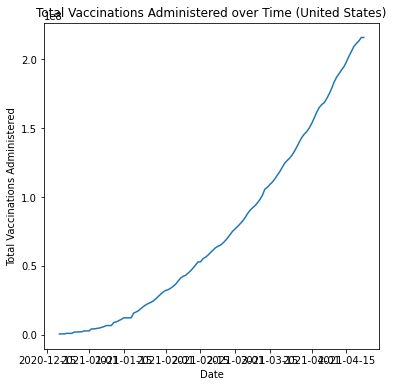

In [48]:
# US Vaccinations over Time
plt.figure(figsize=(6,6))
plt.plot(vax_GLO_USA.loc[:, 'DateTime'], vax_GLO_USA.loc[:, 'Doses_admin'])
# plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.xlabel('Date')
plt.ylabel('Total Vaccinations Administered')
plt.title('Total Vaccinations Administered over Time (United States)')

In [49]:
# vax_GLO_USA.iloc[0:1].loc[:, 'Date']
# vax_GLO_USA.iloc

# vax_GLO_USA.loc[:, 'Doses_admin_sum'] = vax_GLO_USA.Doses_admin.cumsum()
# vax_GLO_USA['Doses_shipped_sum'] = vax_GLO_USA.Doses_shipped.cumsum()

# US Cases --> US State Cases

In [50]:
# Only USA data for All types of vaccines

vax_USA = pd.read_csv('https://raw.githubusercontent.com/govex/COVID-19/master/data_tables/vaccine_data/us_data/time_series/vaccine_data_us_timeline.csv')
vax_USA_All = vax_USA[vax_USA.loc[:, 'Vaccine_Type'] == 'All']
vax_USA_All

,Province_State,Date,Vaccine_Type,FIPS,Country_Region,Lat,Long_,Doses_alloc,Doses_shipped,Doses_admin,Stage_One_Doses,Stage_Two_Doses,Combined_Key
0,Alabama,2020-12-10,All,1.0,US,32.3182,-86.9023,NaN,NaN,NaN,NaN,NaN,"Alabama, US"
3,Alabama,2020-12-11,All,1.0,US,32.3182,-86.9023,NaN,NaN,NaN,NaN,NaN,"Alabama, US"
6,Alabama,2020-12-12,All,1.0,US,32.3182,-86.9023,NaN,NaN,NaN,NaN,NaN,"Alabama, US"
9,Alabama,2020-12-13,All,1.0,US,32.3182,-86.9023,NaN,NaN,NaN,NaN,NaN,"Alabama, US"
12,Alabama,2020-12-14,All,1.0,US,32.3182,-86.9023,40950.0,NaN,NaN,NaN,NaN,"Alabama, US"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28746,Department of Defense,2021-04-22,All,NaN,US,NaN,NaN,NaN,3436910.0,2613336.0,1640776.0,897226.0,"Department of Defense, US"
28751,Federal Bureau of Prisons,2021-04-22,All,NaN,US,NaN,NaN,NaN,147940.0,134268.0,78922.0,54680.0,"Federal Bureau of Prisons, US"
28756,Indian Health Services,2021-04-22,All,NaN,US,NaN,NaN,NaN,1666225.0,1174252.0,690624.0,476312.0,"Indian Health Services, US"
28761,Long Term Care (LTC) Program,2021-04-22,All,NaN,US,NaN,NaN,NaN,NaN,7782215.0,NaN,NaN,"Long Term Care (LTC) Program, US"


In [52]:
# Adding column for dates as DateTime

vax_USA_All.loc[:, 'DateTime'] = pd.to_datetime(vax_USA_All.loc[:, 'Date'], format='%Y-%m-%d')

In [51]:
# Cumulative efficiency = (Total doses administered so far)/(Total doses shipped so far)

vax_USA_All.loc[:, 'Cumulative_efficiency'] = vax_USA_All.loc[:, 'Doses_admin'] / vax_USA_All.loc[:, 'Doses_shipped']

C:\Users\Akash Nivarthi\anaconda3\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\Users\Akash Nivarthi\anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [53]:
# vax_USA_All

In [54]:
# vax_USA_AL = vax_USA_All[vax_USA_All.loc[:, 'Province_State']=='Alabama']
# vax_USA_AL

In [55]:
# vax_USA_AL_ri = vax_USA_AL.reset_index(drop=True)
# vax_USA_AL_ri

In [56]:
# plt.plot( vax_USA_AL_ri.index,
#           vax_USA_AL_ri.loc[:, 'Cumulative_efficiency'] )

In [18]:
# vax_USA_AL_ri.loc[120:130]

### US Vaccinations, Collected by State

In [57]:
# This dataset stores the collection of each state's vaccination data for All vaccines in each row, indexed by state name

byState = pd.DataFrame(vax_USA_All.groupby('Province_State'))
byState.set_index(0, inplace=True)
byState

,1
0,
Alabama,Province_State Date Vaccine_Type ...
Alaska,Province_State Date Vaccine_Type ...
American Samoa,Province_State Date Vaccine_Type...
Arizona,Province_State Date Vaccine_Type ...
Arkansas,Province_State Date Vaccine_Type ...
...,...
Virginia,Province_State Date Vaccine_Type ...
Washington,Province_State Date Vaccine_Type ...
West Virginia,Province_State Date Vaccine_Type ...


In [80]:
# vax_USA_AL_ri.loc[:, 'DateTime']

In [119]:
# Analyze one state
StateName = 'Wyoming'

In [120]:
# byState.loc['Alabama', 1]

In [129]:
# Number of doses administered each day: difference in day-to-day total dose count

for State in byState.index:
    byState.loc[State, 1].loc[:, 'Doses_admin_today'] = byState.loc[State, 1].loc[:, 'Doses_admin'].diff()

StateData = byState.loc[StateName, 1]
StateData

,Province_State,Date,Vaccine_Type,FIPS,Country_Region,Lat,Long_,Doses_alloc,Doses_shipped,Doses_admin,Stage_One_Doses,Stage_Two_Doses,Combined_Key,Cumulative_efficiency,DateTime,Doses_admin_today
17175,Wyoming,2020-12-10,All,56.0,US,42.756,-107.3025,NaN,NaN,NaN,NaN,NaN,"Wyoming, US",NaN,2020-12-10,NaN
17178,Wyoming,2020-12-11,All,56.0,US,42.756,-107.3025,NaN,NaN,NaN,NaN,NaN,"Wyoming, US",NaN,2020-12-11,NaN
17181,Wyoming,2020-12-12,All,56.0,US,42.756,-107.3025,NaN,NaN,NaN,NaN,NaN,"Wyoming, US",NaN,2020-12-12,NaN
17184,Wyoming,2020-12-13,All,56.0,US,42.756,-107.3025,NaN,NaN,NaN,NaN,NaN,"Wyoming, US",NaN,2020-12-13,NaN
17187,Wyoming,2020-12-14,All,56.0,US,42.756,-107.3025,27075.0,4875.0,NaN,NaN,NaN,"Wyoming, US",NaN,2020-12-14,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27496,Wyoming,2021-04-18,All,56.0,US,42.756,-107.3025,NaN,468615.0,323593.0,186241.0,129184.0,"Wyoming, US",0.690531,2021-04-18,196.0
27801,Wyoming,2021-04-19,All,56.0,US,42.756,-107.3025,NaN,468615.0,323699.0,186359.0,129238.0,"Wyoming, US",0.690757,2021-04-19,106.0
28106,Wyoming,2021-04-20,All,56.0,US,42.756,-107.3025,NaN,468615.0,323956.0,186518.0,129368.0,"Wyoming, US",0.691305,2021-04-20,257.0
28411,Wyoming,2021-04-21,All,56.0,US,42.756,-107.3025,NaN,469615.0,332765.0,189818.0,134311.0,"Wyoming, US",0.708591,2021-04-21,8809.0


Text(0, 0.5, 'Cumulative Efficiency')

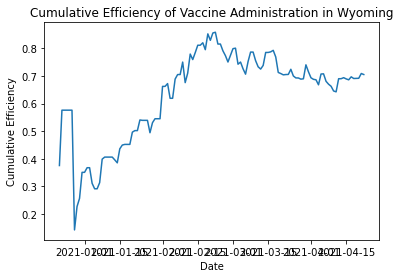

In [122]:
# Plotting Washington Cumulative Efficiency over Time

plt.plot(StateData.loc[:, 'DateTime'], StateData.loc[:, 'Cumulative_efficiency'])
plt.title('Cumulative Efficiency of Vaccine Administration in ' + StateName)
plt.xlabel('Date')
plt.ylabel('Cumulative Efficiency')

Text(0, 0.5, 'Cumulative Doses Administered')

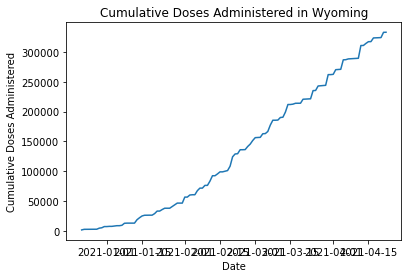

In [123]:
# Plotting Washington Total Doses Admin over Time

plt.plot(StateData.loc[:, 'DateTime'], StateData.loc[:, 'Doses_admin'])
plt.title('Cumulative Doses Administered in ' + StateName)
plt.xlabel('Date')
plt.ylabel('Cumulative Doses Administered')

Text(0, 0.5, 'Doses Administered on the Day')

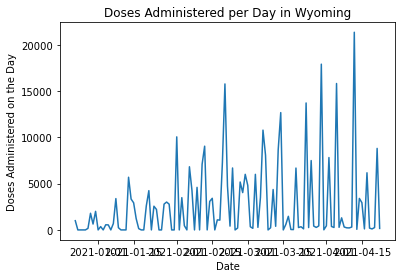

In [124]:
# Plotting Washington Doses Admin Each Day over Time

plt.plot(StateData.loc[:, 'DateTime'], StateData.loc[:, 'Doses_admin_today'])
plt.title('Doses Administered per Day in ' + StateName)
plt.xlabel('Date')
plt.ylabel('Doses Administered on the Day')

In [125]:
len(StateData)

134

In [149]:
StateData_weekly = StateData.groupby(pd.Grouper(key="DateTime", freq="1W")).sum().loc[:, 'Doses_admin_today']
StateData_weekly.head()

DateTime
2020-12-13       0.0
2020-12-20       0.0
2020-12-27     997.0
2021-01-03    4964.0
2021-01-10    5407.0
Freq: W-SUN, Name: Doses_admin_today, dtype: float64

Text(0, 0.5, 'Doses Administered During the Week')

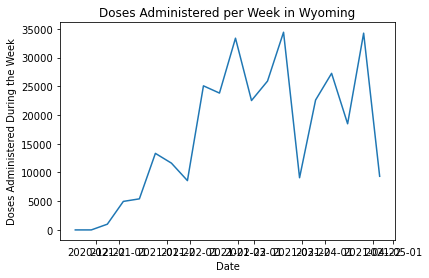

In [152]:
# Plotting Washington Doses Admin Each Week over Time

plt.plot(StateData_weekly.index, StateData_weekly)
plt.title('Doses Administered per Week in ' + StateName)
plt.xlabel('Date')
plt.ylabel('Doses Administered During the Week')

In [140]:
StateData_weekly.index[len(StateData_weekly)-1]

Timestamp('2021-04-21 00:00:00', freq='4D')

In [ ]:
# WY_Data = byState.loc['Wyoming', 1]